# Visualize SN10 hidden layer projections

In [1]:
import os
from pathlib import Path
from typing import List
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import umap
from sklearn.model_selection._search import ParameterGrid

import torch
# from torch import nn

# import logomaker

import NegativeClassOptimization.config as config
import NegativeClassOptimization.utils as utils
import NegativeClassOptimization.preprocessing as preprocessing
from NegativeClassOptimization import ml
from NegativeClassOptimization import datasets, pipelines, visualisations

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
experiment_id = "11"
run_id = "da83601c9a144786b1e324420be94a40"

df_train_path = f"../data/nco_mlflow_runs/ftp/artifacts_store/11/{run_id}/artifacts/dataset/train_dataset.tsv/64e03d8c_train_dataset.tsv"
df_test_path = f"../data/nco_mlflow_runs/ftp/artifacts_store/11/{run_id}/artifacts/dataset/test_dataset.tsv/64e03d8c_test_dataset.tsv"
model_path = f"../data/nco_mlflow_runs/ftp/artifacts_store/11/{run_id}/artifacts/models/trained_model"

In [3]:
ag_pos = "3VRL"
ag_neg = "1NSN"
# df_para = utils.load_paratopes()

# df = utils.load_global_dataframe(with_paratope=True)
df_train = pd.read_csv(df_train_path, sep="\t")
# df_train = preprocessing.onehot_encode_df(df_train)

df_test = pd.read_csv(df_test_path, sep="\t")
df_test = preprocessing.onehot_encode_df(df_test)

model = torch.load(Path(model_path) / "data/model.pth")

Compute hidden layer values before activation.

In [4]:
x = torch.tensor(np.stack(df_test["Slide_onehot"])).type(torch.float32)
x = model.flatten(x)
x = model.linear_1(x)
x = x.detach().numpy()

Compute umap projections and plot

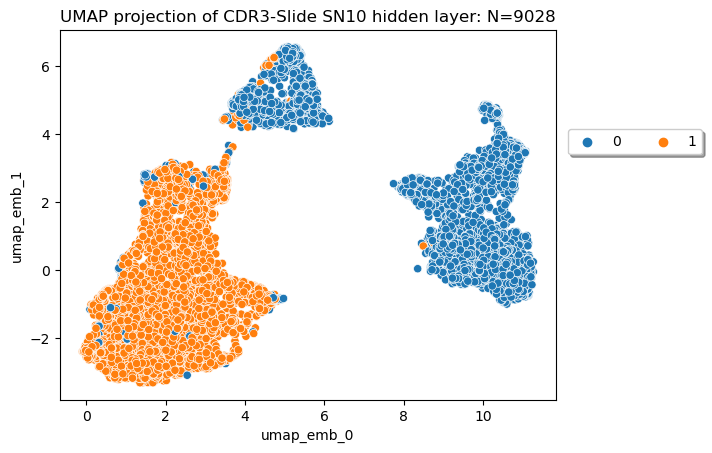

In [5]:
reducer = umap.UMAP(n_neighbors=50, min_dist=1e-6, metric="euclidean")
embedding = reducer.fit_transform(x)

df_test["umap_emb_0"] = embedding[:, 0]
df_test["umap_emb_1"] = embedding[:, 1]
sns.scatterplot(data=df_test, x="umap_emb_0", y="umap_emb_1", hue="y")
plt.legend(bbox_to_anchor=(1.01, 0.75),
    ncol=3, fancybox=True, shadow=True)
plt.title(f'UMAP projection of CDR3-Slide SN10 hidden layer: N={df_test.shape[0]}')
plt.show()

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 10}


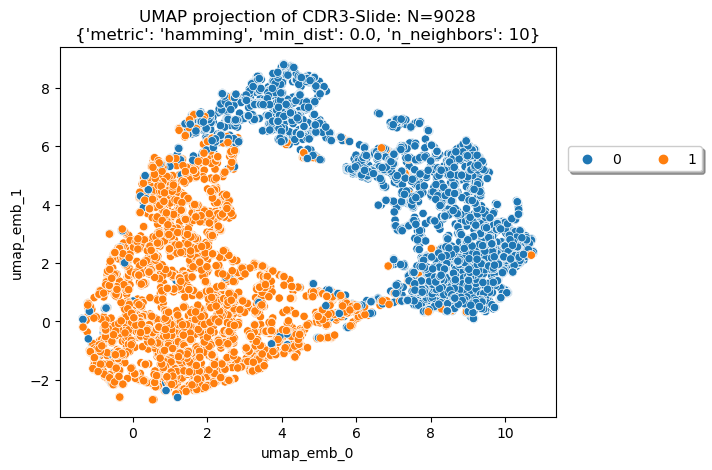

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 50}


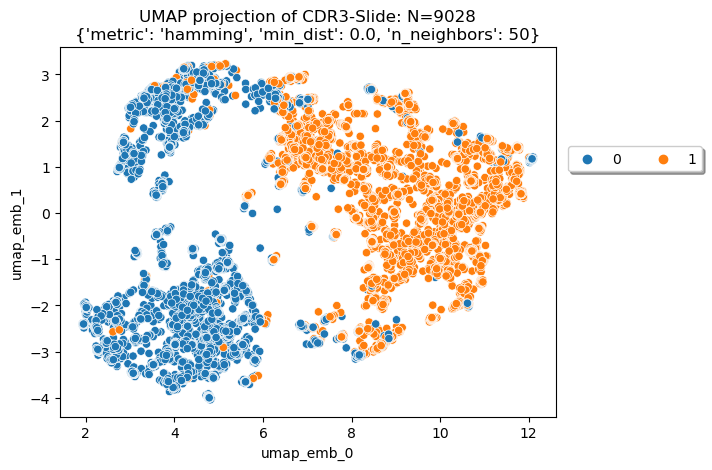

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 300}


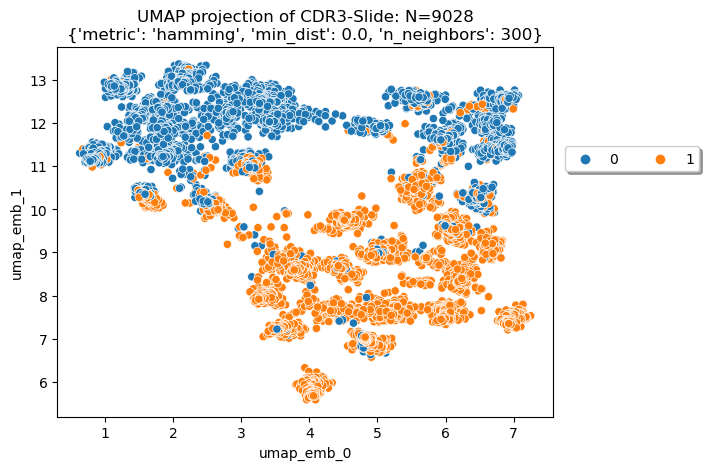

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 600}


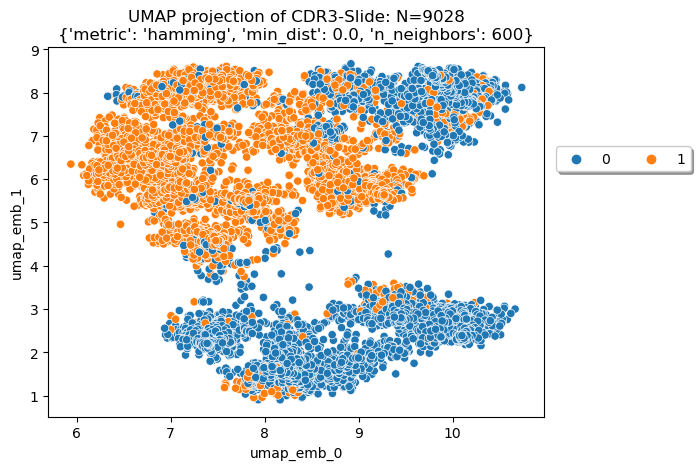

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 10}


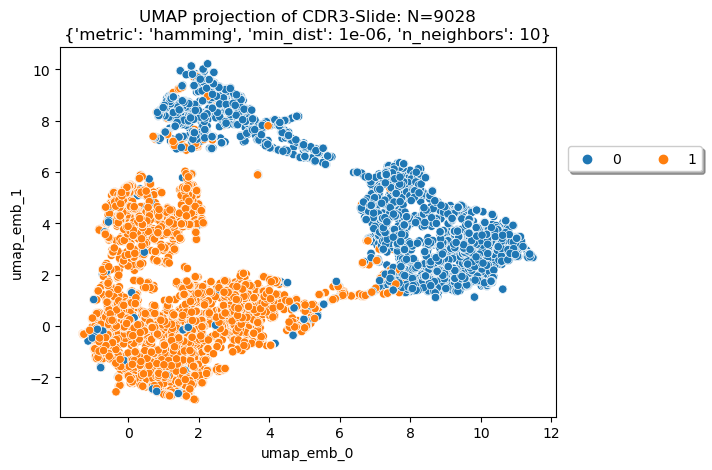

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 50}


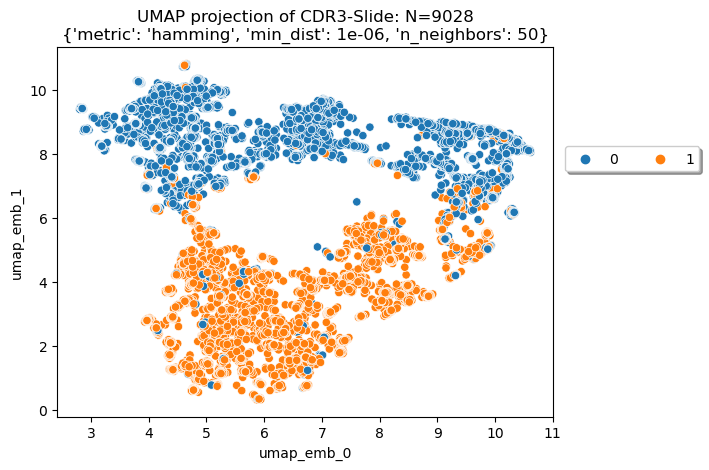

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 300}


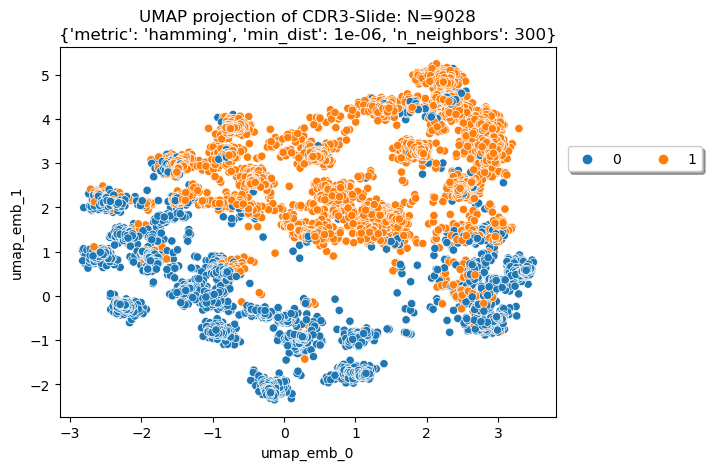

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 600}


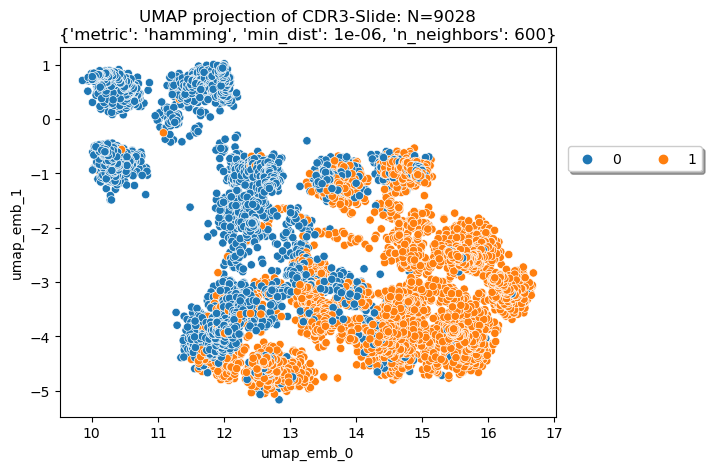

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 10}


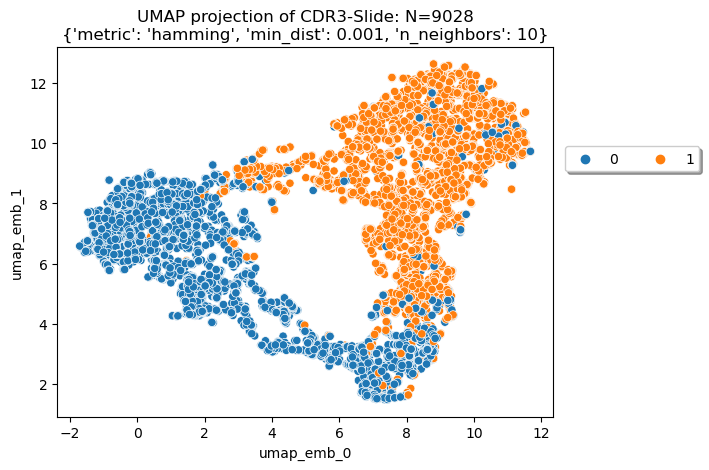

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 50}


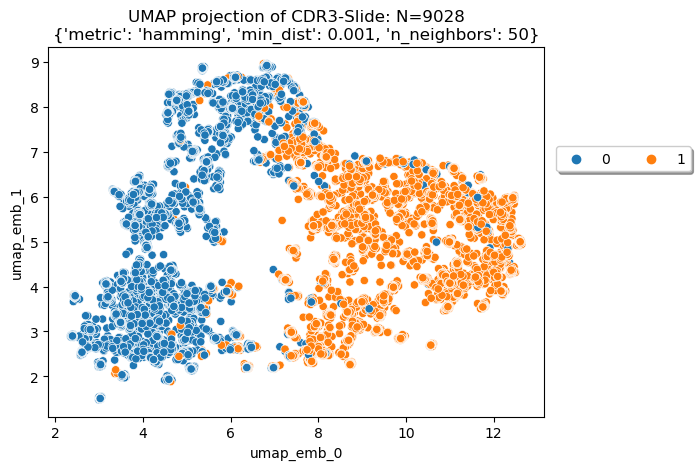

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 300}


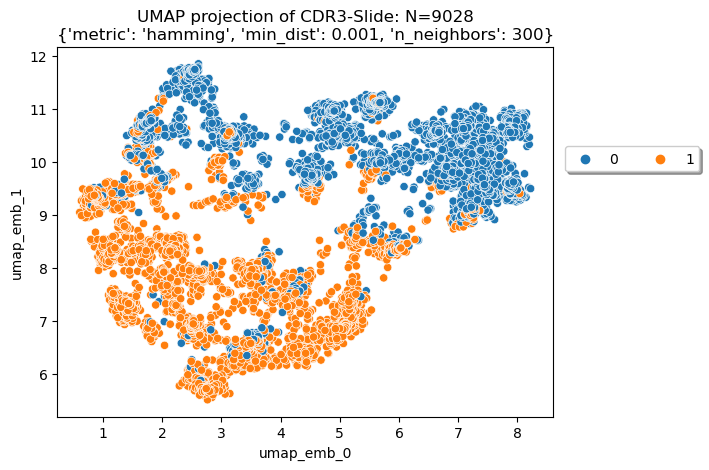

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 600}


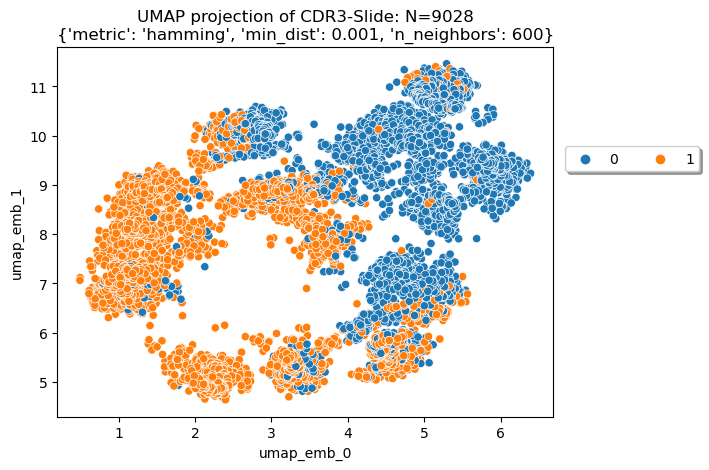

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 10}


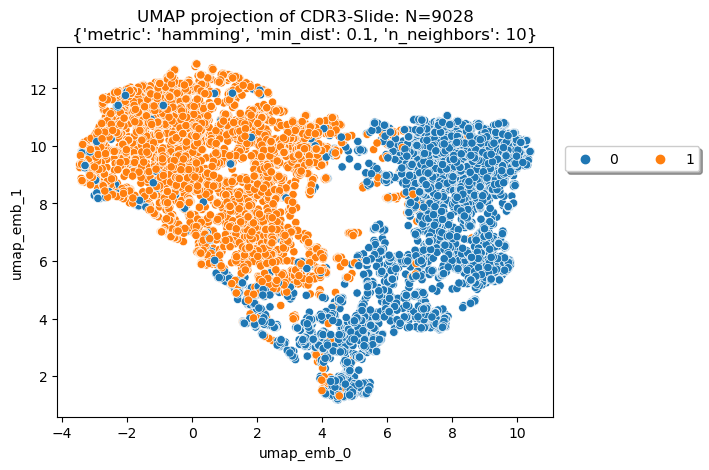

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 50}


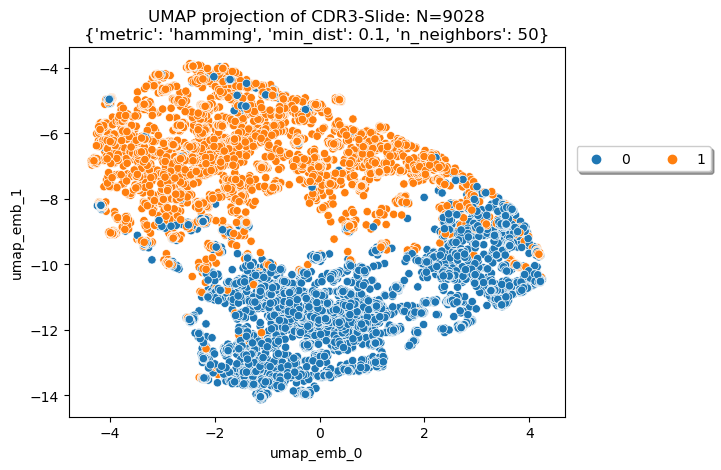

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 300}


In [6]:
param_grid = ParameterGrid({
    "n_neighbors": [10, 50, 300,  600],
    "min_dist": [0.0, 1e-6, 1e-3, 0.1, 0.5],
    "metric": ["hamming"],
})

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for params in param_grid:
        print(f"Computing for: {params}")
        reducer = umap.UMAP(**params)
        embedding = reducer.fit_transform(x)
        df_test["umap_emb_0"] = embedding[:, 0]
        df_test["umap_emb_1"] = embedding[:, 1]
        sns.scatterplot(data=df_test, x="umap_emb_0", y="umap_emb_1", hue="y")
        plt.legend(bbox_to_anchor=(1.01, 0.75),
            ncol=3, fancybox=True, shadow=True)
        plt.title(f'UMAP projection of CDR3-Slide: N={df_test.shape[0]}\n{params}')
        plt.show()